In [0]:
import numpy as np
import cv2
import glob
from skimage import io
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

face_detector = cv2.CascadeClassifier('/content/drive/My Drive/COS 302/faces/haarcascade_frontalface_default.xml')

In [0]:
# https://github.com/aboyker/face-recognition was helpful for seeing an example of cropping these data.
glasses = []
for fn in glob.glob("/content/drive/My Drive/COS 302/faces/*.glasses"):
  #print(fn)
  im = io.imread(fn, as_gray=True)
  face_loc = face_detector.detectMultiScale(np.array(im, dtype='uint8'))
  x, y = face_loc[0][:2]
  cropped = im[y: y + 150, x: x + 150]
  glasses.append(cropped / np.sqrt(np.sum(cropped**2)))
glasses = np.array(glasses)

noglasses = []
for fn in glob.glob("/content/drive/My Drive/COS 302/faces/*.noglasses"):
  #print(fn)
  im = io.imread(fn, as_gray=True)
  face_loc = face_detector.detectMultiScale(np.array(im, dtype='uint8'))
  x, y = face_loc[0][:2]
  cropped = im[y: y + 150, x: x + 150]
  noglasses.append(cropped / np.sqrt(np.sum(cropped**2)))
noglasses = np.array(noglasses)
        

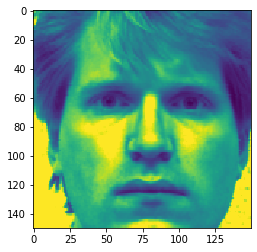

In [0]:
plt.imshow(noglasses[0,:,:])
mean_glasses = np.mean(glasses, axis=0)
mean_noglasses = np.mean(noglasses, axis=0)
glasses_filter = mean_glasses - mean_noglasses
glasses_filter = glasses_filter / np.sqrt(np.sum(glasses_filter**2))

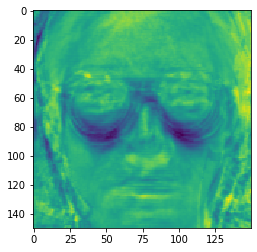

In [0]:
plt.imshow(glasses_filter)

In [0]:
np.sum(noglasses[0,:,:] * glasses_filter)

-6.236638807781217